<a href="https://colab.research.google.com/github/HurryNair/EPI_Python/blob/main/O(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alright, welcome to **O(1)**! 

If you don't know what that means, you're probably at the wrong place and need to look it up first.

First things first. Before you rule me a brute, a moments silence to the multi-line comment syntax in Python. Thanks Van!

Now that we have that out of the way, let's talk algorithms!

Let's assume you sleep with one eye open while you keep the other one on the market. Let's also assume that you have a weeks worth of opening share prices of a particular stock that you've been watching and would like to work some sort of a trend off it. 

Let's assume below list to contain a week's worth of share prices.

In [1]:
l = [3, 4, 6, 5, 7, 6, 5]

For the sake of argument let's assume that I would like to know, based on last weeks data, what would have been the maximum profit if I were to buy and sell a share all within the same week.

So to rephrase, I would like to buy a share ideally when the price is at its lowest & then sell it when the price of the share peaks in order to maximize profit. One thing to pay attention to is the fact that we cannot sell a share before we buy it.

So what's the easiest way to do this ? 

Maybe a brute-force technique to start off ?

In [2]:
# Creating two pointers to iterate through the list 
# with one point fixated on the date of purchase (i) 
# and with the other (j) calculating all possible profits/loss scenarios
# starting with the day after the day of purchase
 
max_profit = 0
 
for i in range(0, len(l) - 1): # If I were to buy a share on day i
  for j in range(i+1, len(l)): #Would me selling on day j 
    if l[j] - l[i] > max_profit : # fetch me more profits than it did on any day before this ?
      max_profit = l[j] - l[i]
    # repeat experiment with next day as day of purchase
 
print("Max attainable profit : " + str(max_profit))

Max attainable profit : 4


Now we'd expect this code to say 4 because we see that the smartest buy would be on day 0 & the smartest sell would be on day 4.

So that's that. Now we take a quick minute to try and quantify this approach.

Assuming we have an input of n days, we see that the outer for loop runs (n-1) times while the inner for loop runs i times lesser i.e (n-1-i) times.

So that would be (n-2) of (n-1-i) iterations making the run-time complexity of this algorithm O(n^2)

Coming to space complexity it uses two iterators & one variable. This can be written off since it would remain a constant.

Let's check some corner cases & graph this up!

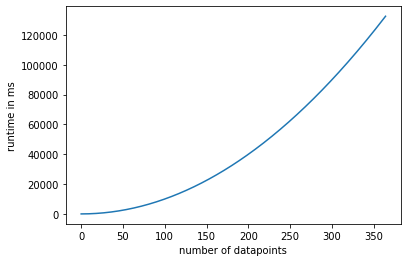

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import numpy as np
 
#Assuming I have 365 days of share prices
n = 365
t = np.arange(n)
 
plt.xlabel("number of datapoints")
plt.ylabel("runtime in ms")
 
plt.plot(t**2)
show()

Calling this approach naive would be an understatement as it would result in unacceptably large runtimes & would definitely result in a TLE.

A commonly used technique to control runtime of a brute force solution would be to divide the problem into subproblems & handle them individually. 

In [6]:
# Divide array into two subarrays
# Calculate individual max profits
# Identify the greater of the two
 
# A possible corner case is when the smartest buy lies in the 
# first subarray with the smartest sell lying in the second subarray
# This can be handled in O(n) time complexity by keeping track of min
# in the first & max in the second subarray
 
# Subarray 1
max_profit1 = 0
minimum1 = l[0]
for i in range((len(l)//2)-1):
    if l[i] < minimum1 : minimum1 = l[i]
    for j in range(i+1, (len(l)//2)):
        if l[j] - l[i] > max_profit1:
          max_profit1 = l[j] - l[i]
 
# Subarray 2
max_profit2 = 0
maximum2 = l[len(l)//2]
for i in range(len(l)//2, len(l)-1):
    if l[i] > maximum2 : maximum2 = l[i]
    for j in range(i+1, len(l)):
        if l[j] - l[i] > max_profit2:
          max_profit2 = l[j] - l[i]
 
print(max(max_profit1, max_profit2, (maximum2 - minimum1)))

4


If we were to say the runtime for the brute-force solution was T, then the time complexity analysis of the above divide & conquer solution would yield 2(T/2) + O(n) which can further be simplified down to O(nlog(n)).

Plotting this up against a years worth of datapoints, we see staggering changes.

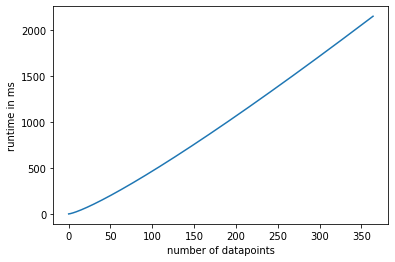

In [7]:
from math import log
 
y = [(i+1)*(log(i+1)) for i in t]
 
plt.xlabel("number of datapoints")
plt.ylabel("runtime in ms")
 
plt.plot(y)
show()

We see that a simple modification to our approach has brought down the runtime by a factor of 0.16. 

Would there at all be single pass solution to this ? If so how much more efficient & therefore how much more important ?

In [8]:
# Passing over the list, we only evaluate one thing
# Is this a good day to buy/sell, or is this a good to hold ?
 
# Max profit attainable on day i is essentially the difference between
# the price on that day minus the least price so far
 
min_so_far = l[0]
max_profit_so_far = 0
 
for i in range(len(l)):
  if l[i] < min_so_far : # A good day to buy
    min = l[i]
  if l[i] - min_so_far > max_profit_so_far :
    max_profit_so_far = l[i] - min_so_far
 
print(max_profit_so_far)

4


The for loop is run one time per input. The time complexity of the above algorithm would therefore be directly dependent on the number of inputs & the number of inputs only, making it O(n).

Quickly doing the math, we see a 97% faster solution when compared to our brute-force solution & an 82% faster solution in comparison to the divide and conquer approach applied onto the brute force approach.

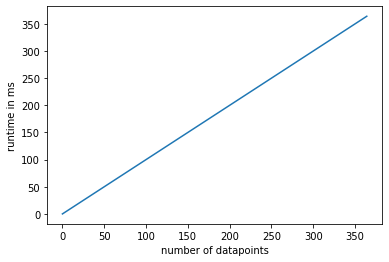

In [9]:
y = [i for i in t]
 
plt.xlabel("number of datapoints")
plt.ylabel("runtime in ms")
 
plt.plot(y)
show()

And that is why algorithms are beautiful!

If there's anything you think I should be doing differently or if you wanna see more of that math, let me know and I'll start making changes!